In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')
data.shape

(48895, 16)

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Handling Missing values

In [5]:
# # Checking for the percentage of ? values in each features before handling them
# for i in data.columns:
#     if data[data[i]=='?'].shape[0] > 0:
#         print(i,data[i][data[i]=='?'].value_counts(),data[i][data[i]=='?'].value_counts()/data.shape[0])
# # since more than 20% of the values in normalized-losses is missing i.e. ?-mark 

In [7]:
# mean or median - ?
data = data.drop(['name','host_id','host_name','id'],axis = 1)
data.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
data['last_review']=data['last_review'].fillna(0)
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [8]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values='?', strategy='mean')
# imputer = imputer.fit(data)
# data = imputer.transform(data)
# data.head()

In [11]:
# Handling missing values
# 1. Removing those values from dataset. 
# 2. Create a seperate models for handling missing values for each features in the dataset. (Time consuming)
# 3. Statistical methods - mean, median and mode.
# Dropping the particular feature itself.
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39606 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             39606 non-null  object 
 1   neighbourhood                   39606 non-null  object 
 2   latitude                        39606 non-null  float64
 3   longitude                       39606 non-null  float64
 4   room_type                       39606 non-null  object 
 5   price                           39606 non-null  int64  
 6   minimum_nights                  39606 non-null  int64  
 7   number_of_reviews               39606 non-null  int64  
 8   last_review                     39606 non-null  object 
 9   reviews_per_month               39606 non-null  float64
 10  calculated_host_listings_count  39606 non-null  int64  
 11  availability_365                39606 non-null  int64  
dtypes: float64(3), int64(5), object(

# Outlier detection and handling

1. Data points that fall outside 1.5 times of an interquatile range above of the 3rd quantile and below the 1st quantile range
2. Data points that fall outside of 3 std. we can use z score and if that z score falls outside of 2 standard deviation

In [17]:
# Using Z-score
def find_outlier(data,col):
    mean = np.mean(data[col])
    threshold = 3
    std = np.std(data[col])
    outliers = []
    for i in data[col].values.tolist():
        zscore = (i-mean)/std
        if np.abs(zscore) > threshold:
            outliers.append(i)
    return outliers

In [18]:
# data['price'] = data['price'].astype(float)
# print(find_outlier(data,'price'))
# print(find_outlier(data,'latitude'))
# print(find_outlier(data,'longitude'))
# print(find_outlier(data,'price'))
# print(find_outlier(data,'minimum_nights'))
# print(find_outlier(data,'number_of_reviews'))
# print(find_outlier(data,'reviews_per_month'))
# print(find_outlier(data,'calculated_host_listings_count'))

print(data.shape)
data = data[~data['latitude'].isin(find_outlier(data,'latitude'))]
data = data[~data['longitude'].isin(find_outlier(data,'longitude'))]
data = data[~data['price'].isin(find_outlier(data,'price'))]
data = data[~data['minimum_nights'].isin(find_outlier(data,'minimum_nights'))]
data = data[~data['number_of_reviews'].isin(find_outlier(data,'number_of_reviews'))]
data = data[~data['reviews_per_month'].isin(find_outlier(data,'reviews_per_month'))]
data = data[~data['calculated_host_listings_count'].isin(find_outlier(data,'calculated_host_listings_count'))]
print(data.shape)

(39606, 12)
(33404, 12)


# Anomaly detection and handling

In [13]:
# def estimateGaussian(X):
#     m = X.shape[0]
#     #compute mean of X
#     sum_ = np.sum(X,axis=0)
#     mu = (sum_/m)
#     # compute variance of X
#     var = np.var(X,axis=0)
#     return mu,var

# def multivariateGaussian(X, mu, sigma):
# #     k = len(mu)
#     sigma=np.diag(sigma)
#     X = X - mu.T
#     p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma) * X,axis=1))
#     return p
# mu, sigma = estimateGaussian(data['price'])
# print(mu, sigma)
# p = multivariateGaussian(data['price'], mu, sigma)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


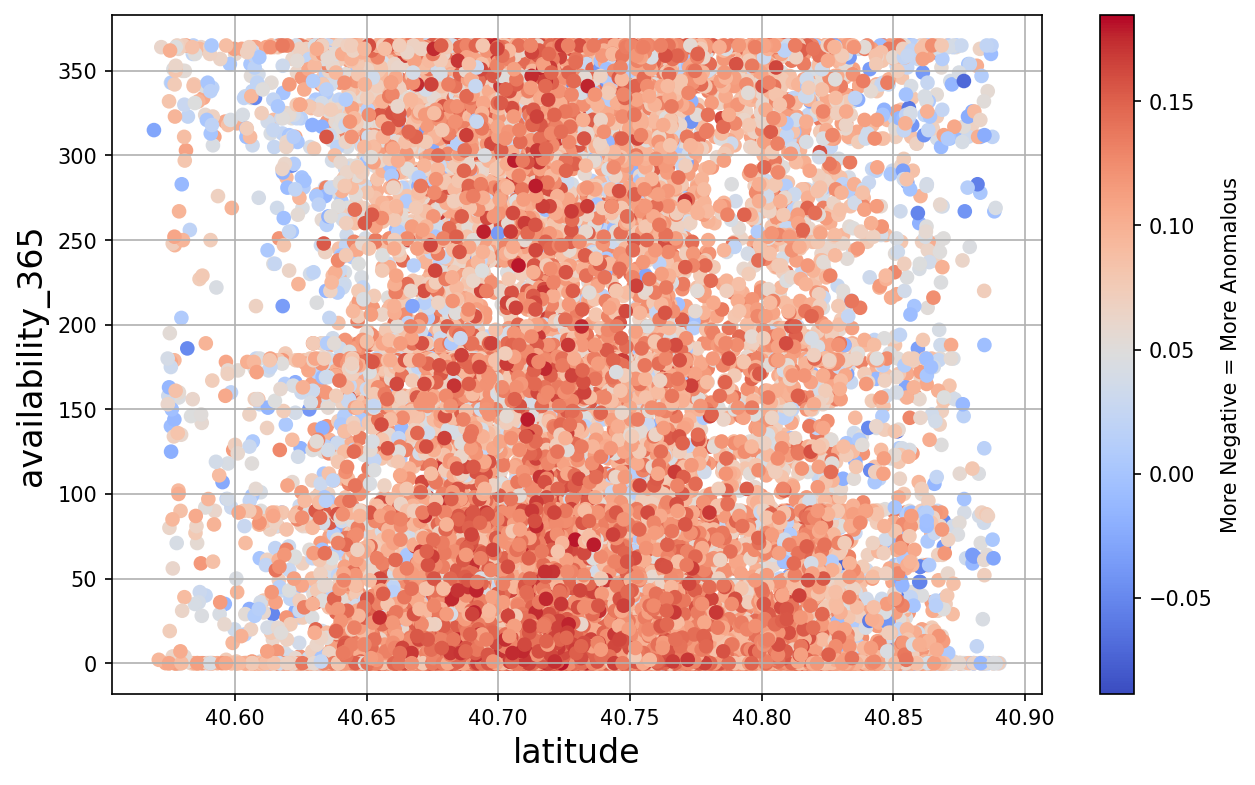

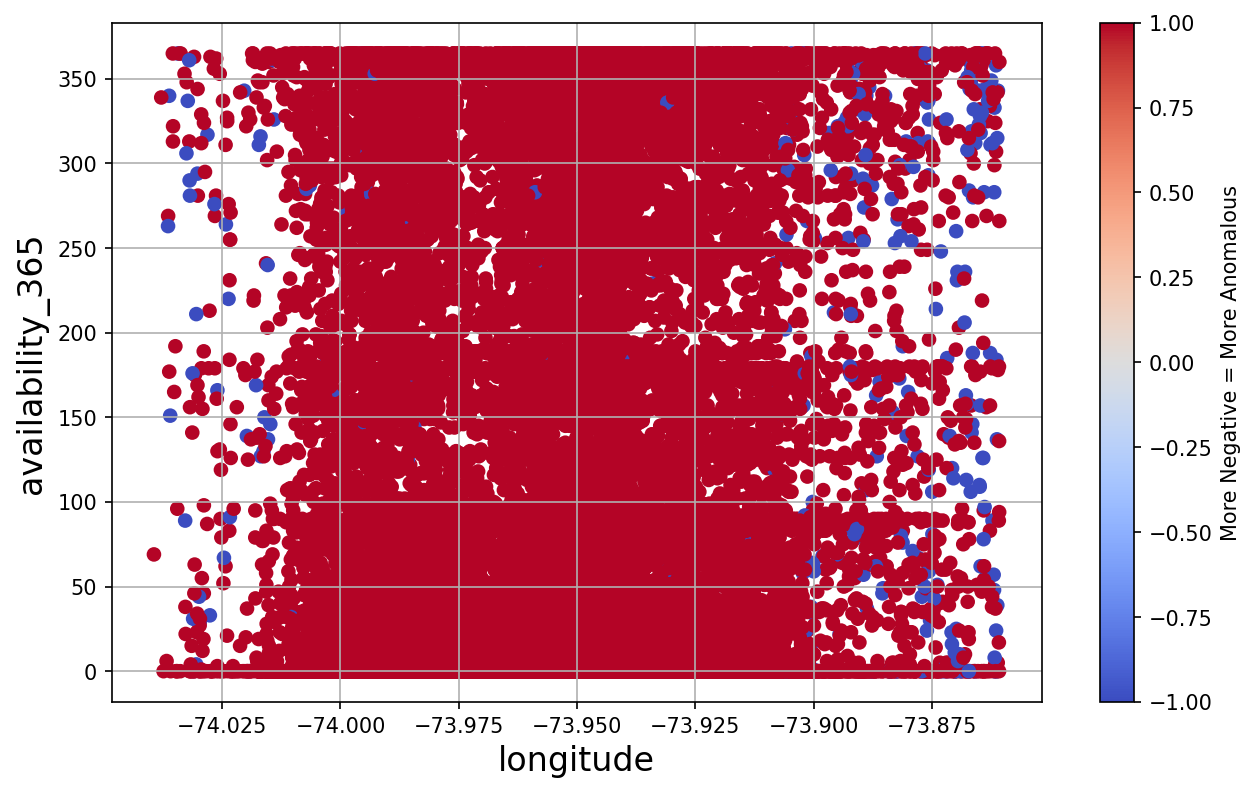

In [19]:
# Create Artificial Data with Multivariate Outliers
# d1 = np.random.multivariate_normal(mean = np.array([-.5, 0]),cov = np.array([[1, 0], [0, 1]]), size = 100)
# d2 = np.random.multivariate_normal(mean = np.array([15, 10]),cov = np.array([[1, 0.3], [.3, 1]]), size = 100)
# outliers = np.array([[0, 10],[0, 9.5]])
# d = pd.DataFrame(np.concatenate([d1, d2, outliers], axis = 0), columns = ['Var 1', 'Var 2'])
################### Train Isolation Forest #################
from sklearn import ensemble
anomaly_data = data[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count']]
model  =  ensemble.IsolationForest(n_estimators=50, max_samples=500, contamination=.01, max_features=2, 
                         bootstrap=False, n_jobs=1, random_state=1, verbose=0, warm_start=False).fit(anomaly_data)
# Get Anomaly Scores and Predictions
anomaly_score = model.decision_function(anomaly_data)
predictions = model.predict(anomaly_data)
######### Visualize Anomaly scores and Anomaly Status ########
plt.figure(figsize = (10, 6), dpi = 150)
s = plt.scatter(data['latitude'], data['availability_365'], c = anomaly_score, cmap = 'coolwarm')
plt.colorbar(s, label = 'More Negative = More Anomalous')
plt.xlabel('latitude', fontsize = 16)
plt.ylabel('availability_365', fontsize = 16)
plt.grid()
# To Plot Predictions
plt.figure(figsize = (10, 6), dpi = 150)
s = plt.scatter(data['longitude'], data['availability_365'], c = predictions, cmap = 'coolwarm')
plt.colorbar(s, label = 'More Negative = More Anomalous')
plt.xlabel('longitude', fontsize = 16)
plt.ylabel('availability_365', fontsize = 16)
plt.grid()
# plt.title('Contamination = 0.01', weight = 'bold')

# Handling Higly Correlated variables

In [20]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,33404.000000,33404.000000,33404.000000,33404.000000,33404.000000,33404.000000,33404.000000,33404.000000
mean,40.728937,-73.956337,123.618758,3.576009,12.078673,0.685379,1.504700,78.372470
std,0.054172,0.030174,72.705312,3.838124,17.565378,0.902955,1.187712,117.294329
min,40.569310,-74.039420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.689650,-73.981580,69.000000,1.000000,1.000000,0.030000,1.000000,0.000000
50%,40.721015,-73.955080,100.000000,2.000000,4.000000,0.270000,1.000000,4.000000
75%,40.764120,-73.938870,160.000000,4.000000,16.000000,1.000000,1.000000,127.000000
max,40.890220,-73.860770,375.000000,28.000000,81.000000,3.870000,9.000000,365.000000


In [21]:
# anomaly detection and handling using gaussion mixture models
data.corr().abs()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.134262,0.061534,0.016756,0.008514,0.009926,0.035979,0.026273
longitude,0.134262,1.000000,0.366206,0.035361,0.042450,0.094875,0.121965,0.139709
price,0.061534,0.366206,1.000000,0.034287,0.001411,0.000397,0.125195,0.044126
minimum_nights,0.016756,0.035361,0.034287,1.000000,0.075968,0.152622,0.055375,0.003117
number_of_reviews,0.008514,0.042450,0.001411,0.075968,1.000000,0.590843,0.106890,0.255059
reviews_per_month,0.009926,0.094875,0.000397,0.152622,0.590843,1.000000,0.178594,0.258969
calculated_host_listings_count,0.035979,0.121965,0.125195,0.055375,0.106890,0.178594,1.000000,0.306400
availability_365,0.026273,0.139709,0.044126,0.003117,0.255059,0.258969,0.306400,1.000000


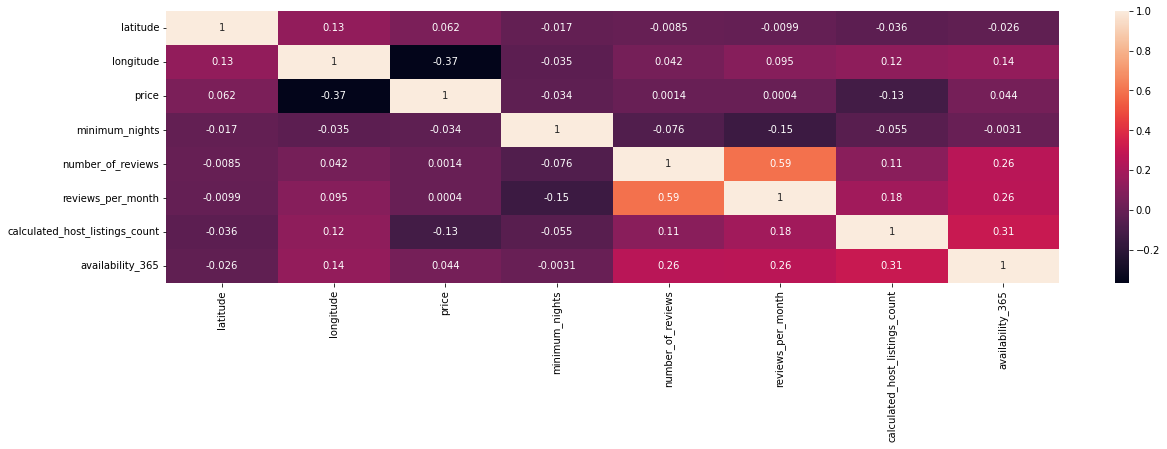

In [22]:
plt.figure(figsize=(20,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Feature Selection and Feature Engineering 

Feature Selection by Checking for any constant columns from all the continous variables list

In [23]:
from sklearn.feature_selection import VarianceThreshold 
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(anomaly_data)
var_thres.get_support()
constant_columns = [column for column in anomaly_data.columns
                    if column not in anomaly_data.columns[var_thres.get_support()]]
print(len(constant_columns))

0


Feature Selection using correlation matrix

In [26]:
def select_features_using_correlation(corr_mat):
    corr_columns = set()
    for i in corr_mat.columns:
        for j in corr_mat.columns:
            if i!=j and abs(corr_mat.loc[i,j]) > 0.7:
                corr_columns.add(i)
    return corr_columns
corr_columns = select_features_using_correlation(data.corr())
# corr_columns.remove('availability_365')
print(corr_columns)

set()


In [27]:
print(f"Before: {data.shape}")
data = data.drop(corr_columns,axis = 1)
print(f"After: {data.shape}")

Before: (33404, 12)
After: (33404, 12)


# Label Encoding for Categorical features

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# 'make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','fuel-system'
encoder.fit(data['neighbourhood_group'])
data['neighbourhood_group'] = encoder.transform(data['neighbourhood_group'])
# encoder.classes_

encoder.fit(data['neighbourhood'])
data['neighbourhood'] = encoder.transform(data['neighbourhood'])

encoder.fit(data['room_type'])
data['room_type'] = encoder.transform(data['room_type'])

# Train and Test data

In [58]:
from sklearn.model_selection import train_test_split
data['reviews_per_month'] = data['reviews_per_month'].astype(int)
# data['last_review'] = 
X = data.drop(['last_review','availability_365'],axis = 1)
X_train,X_test,Y_train,Y_test = train_test_split(X,data['availability_365'],test_size = 0.1)
X_train.shape,X_test.shape

((30063, 10), (3341, 10))

# Model Training

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26723 entries, 26234 to 16744
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             26723 non-null  int32  
 1   neighbourhood                   26723 non-null  int32  
 2   latitude                        26723 non-null  float64
 3   longitude                       26723 non-null  float64
 4   room_type                       26723 non-null  int32  
 5   price                           26723 non-null  int64  
 6   minimum_nights                  26723 non-null  int64  
 7   number_of_reviews               26723 non-null  int64  
 8   reviews_per_month               26723 non-null  int32  
 9   calculated_host_listings_count  26723 non-null  int64  
dtypes: float64(2), int32(4), int64(4)
memory usage: 1.8 MB


In [ ]:
from numpy import asarray
from pandas import read_csv
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score

model = XGBRegressor(n_estimators = 1000,max_depth = 10)
# fit model
model.fit(X_train, Y_train)
# define new data
# make a prediction
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)
train_rmse_score = mean_squared_error(Y_pred_train,Y_train,squared=False)
test_rmse_score = mean_squared_error(Y_pred_test,Y_test,squared=False)
# summarize prediction
print(f"train_rmse_score: {train_rmse_score}")
print(f"test_rmse_score: {test_rmse_score}")

train_r2_score = r2_score(Y_pred_train,Y_train)
test_r2_score = r2_score(Y_pred_test,Y_test)
# summarize prediction
print(f"train_r2_score: {train_r2_score}")
print(f"test_r2_score: {test_r2_score}")

In [55]:
Y_pred_train

array([ 3.5312799e+02, -2.7715281e-01,  3.9980083e+01, ...,
        3.0785818e+02,  1.5706062e+02,  7.1794814e-01], dtype=float32)

In [ ]:
# k - fold cross validation
# rmse, r2, evaluation metrics, best metrics for regression
from sklearn.model_selection import cross_validate, KFold
scores = cross_validate(model,X_train,Y_train,scoring=('neg_mean_squared_error','r2'))
scores

In [ ]:
from sklearn.model_selection import KFold
kfold_cv = KFold(shuffle=True,random_state=42)

In [ ]:
X.shape,data['price'].shape

In [ ]:
for i,(x,y) in enumerate(kfold_cv.split(data)):
    X_train,X_test,Y_train,Y_test = X[X.index.isin(x)],X[X.index.isin(y)],data['availability_365'][data.index.isin(x)],data['availability_365'][data.index.isin(y)]
    print(X_train.shape,X_test.shape)
    model.fit(X_train, Y_train)
    # define new data
    # make a prediction
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    train_rmse_score = mean_squared_error(Y_pred_train,Y_train,squared=False)
    test_rmse_score = mean_squared_error(Y_pred_test,Y_test,squared=False)
    # summarize prediction
    print(f"k-fold: {i}")
    print(f"train_rmse_score: {train_rmse_score}")
    print(f"test_rmse_score: {test_rmse_score}")
    
    train_r2_score = r2_score(Y_pred_train,Y_train)
    test_r2_score = r2_score(Y_pred_test,Y_test)
    # summarize prediction
    print(f"train_r2_score: {train_r2_score}")
    print(f"test_r2_score: {test_r2_score}")

# Model Building: Using Random Forest Algorithm

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
estimators = [100,200,500,750,1000]
for est in estimators: 
    model = RandomForestRegressor(n_estimators = est,criterion = 'squared_error')
    for i,(x,y) in enumerate(kfold_cv.split(data)):
        X_train,X_test,Y_train,Y_test = X[X.index.isin(x)],X[X.index.isin(y)],data['price'][data.index.isin(x)],data['price'][data.index.isin(y)]
        print(X_train.shape,X_test.shape)
        model.fit(X_train, Y_train)
        # define new data
        # make a prediction
        Y_pred_train = model.predict(X_train)
        Y_pred_test = model.predict(X_test)
        train_rmse_score = mean_squared_error(Y_pred_train,Y_train,squared=False)
        test_rmse_score = mean_squared_error(Y_pred_test,Y_test,squared=False)
        # summarize prediction
        print(f"k-fold: {i} n_estimator: {est}")
        print(f"train_rmse_score: {train_rmse_score}")
        print(f"test_rmse_score: {test_rmse_score}")
        
        train_r2_score = r2_score(Y_pred_train,Y_train)
        test_r2_score = r2_score(Y_pred_test,Y_test)
        # summarize prediction
        print(f"train_r2_score: {train_r2_score}")
        print(f"test_r2_score: {test_r2_score}")

(18999, 10) (4748, 10)
k-fold: 0 n_estimator: 100
train_rmse_score: 0.0347291066389472
test_rmse_score: 0.12976608791866728
train_r2_score: 0.9999997582834185
test_r2_score: 0.9999967497089419
(18941, 10) (4806, 10)
k-fold: 1 n_estimator: 100
train_rmse_score: 0.022423396750278192
test_rmse_score: 0.06269074098628852
train_r2_score: 0.9999999006518404
test_r2_score: 0.9999991976955029
(18956, 10) (4791, 10)
k-fold: 2 n_estimator: 100
train_rmse_score: 0.023099073753546615
test_rmse_score: 0.0456681193369485
train_r2_score: 0.9999998931112194
test_r2_score: 0.9999995967194821
(19038, 10) (4709, 10)
k-fold: 3 n_estimator: 100
train_rmse_score: 0.028488187838249655
test_rmse_score: 0.06473380157918392
train_r2_score: 0.9999998400392887
test_r2_score: 0.9999991345837222
(19054, 10) (4693, 10)
k-fold: 4 n_estimator: 100
train_rmse_score: 0.027852062364901706
test_rmse_score: 0.07091454568183174
train_r2_score: 0.9999998455978895
test_r2_score: 0.9999990026031875
(18999, 10) (4748, 10)
k-fol